<a href="https://colab.research.google.com/github/EmilisGit/Vaizdu_apdorojimas/blob/main/Vaizdu_apdorojimas_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from PIL import Image

In [ ]:
%pip install datasets -q
from datasets import load_dataset

ds = load_dataset("Shavindra/satellite-512")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 16.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-nvrtc-cu12==

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/429 [00:00<?, ?B/s]

(…)-00000-of-00001-57440f66cccac15b.parquet:   0%|          | 0.00/332M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/304 [00:00<?, ? examples/s]

In [ ]:
ds = ds.shuffle(seed=42)
dataset_subset = ds['train']['image'][:20]

In [ ]:
#@title Funkcijos
from collections.abc import Sized

def show_image(image):
  plt.figure(figsize=(5, 5))
  plt.axis('off')
  plt.imshow(image)
  plt.show()

def resize_image(image, size):
  cv2_image = np.array(image)
  cv2_image = cv2.resize(cv2_image, (size, size))
  return cv2_image

def apply_random_rotation(image):
  rows, cols = image.shape[:2]

  # centro koordinatės
  Cx , Cy = rows//2, cols//2
  rand_angle = random.randint(-180,180)
  M = cv2.getRotationMatrix2D((Cy, Cx),rand_angle ,1)
  aug_imgR = cv2.warpAffine(image, M, (cols, rows))
  return aug_imgR

def apply_median_blur(image):
  aug_img = cv2.medianBlur(image, 3)
  return aug_img

def adjust_brightness(image):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV).astype(np.float32)

    brightness_factor = np.random.uniform(0.5, 1.5)
    hsv_image[:, :, 2] *= brightness_factor

    hsv_image = np.clip(hsv_image, 0, 255).astype(np.uint8)
    adjusted_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)
    return adjusted_image

def adjust_saturation(image):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV).astype(np.float32)

    saturation_factor = np.random.uniform(0.5, 1.5)
    hsv_image[:, :, 1] *= saturation_factor

    hsv_image = np.clip(hsv_image, 0, 255).astype(np.uint8)
    adjusted_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)
    return adjusted_image

def adjust_hue(image):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV).astype(np.float32)

    hue_shift = np.random.randint(-10, 10)
    hsv_image[:, :, 0] = (hsv_image[:, :, 0] + hue_shift) % 180

    hsv_image = np.clip(hsv_image, 0, 255).astype(np.uint8)
    adjusted_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)
    return adjusted_image

def adjust_contrast(rgb_image):
    contrast_factor = np.random.uniform(0.5, 1.5)
    adjusted_image = np.clip(contrast_factor * rgb_image, 0, 255).astype(np.uint8)
    return adjusted_image

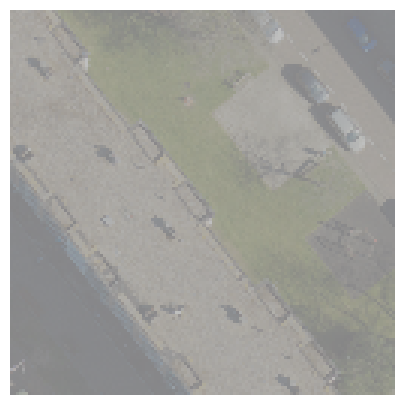

In [ ]:
sample_image = dataset_subset[0]
image = resize_image(sample_image, 128)
image = adjust_contrast(image)
show_image(image)

In [ ]:
mutations = [apply_median_blur, apply_random_rotation, adjust_brightness, adjust_saturation, adjust_hue, adjust_contrast]
def run_pipeline(dataset_subset, results_path):
  for i, img in enumerate(dataset_subset):
    for mutation in mutations:
      image = resize_image(img, 128)
      image = mutation(image)
      os.makedirs(f"{results_path}/{mutation.__name__}", exist_ok=True)
      Image.fromarray(image).save(f"{results_path}/{mutation.__name__}/image_{i}.png")


In [ ]:
run_pipeline(dataset_subset, "./content/nuotraukos")

apply_median_blur


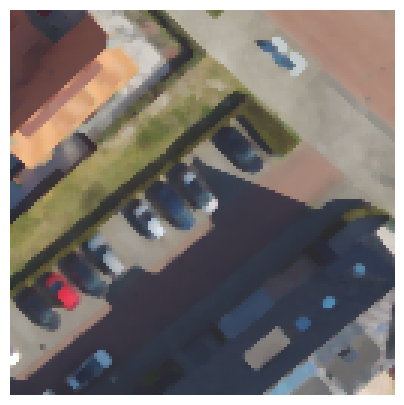

apply_random_rotation


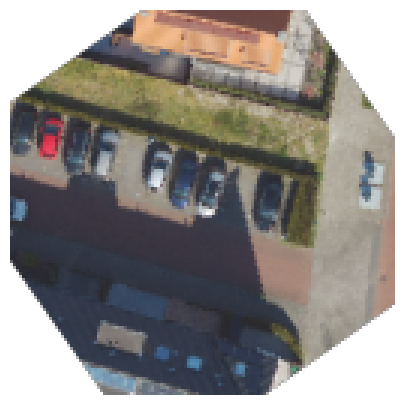

adjust_brightness


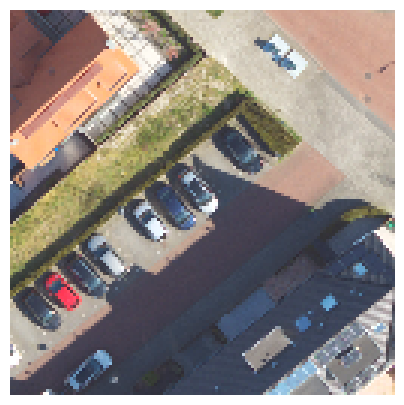

adjust_saturation


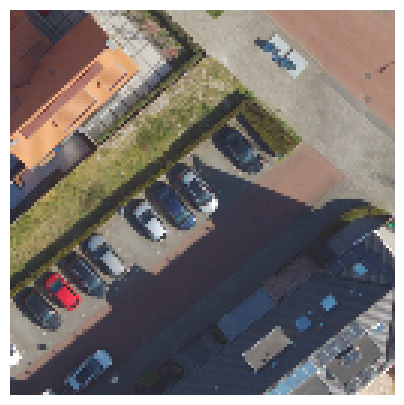

adjust_hue


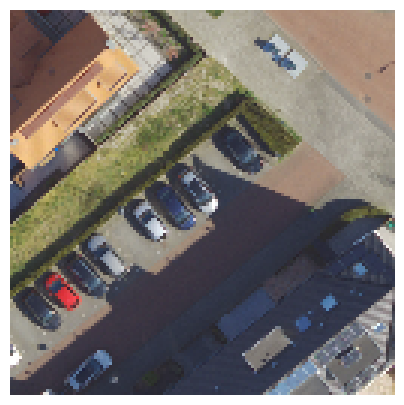

adjust_contrast


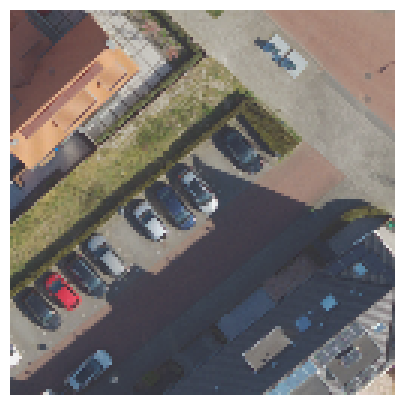

In [ ]:
for mutation in mutations:
  image_path = os.path.join("./content/nuotraukos", mutation.__name__, "image_2.png")
  print(mutation.__name__)
  img = mpimg.imread(image_path)
  show_image(img)